(20141, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          20141 non-null  object 
 1   sha               17419 non-null  object 
 2   source_x          20141 non-null  object 
 3   title             20141 non-null  object 
 4   doi               20141 non-null  object 
 5   pmcid             20141 non-null  object 
 6   pubmed_id         20141 non-null  object 
 7   license           20141 non-null  object 
 8   abstract          15709 non-null  object 
 9   publish_time      20141 non-null  object 
 10  authors           19118 non-null  object 
 11  journal           19795 non-null  object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    17419 non-null  object 
 16  pmc_json_files    15217 non-

/tmp/ipython-input-4124301890.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(


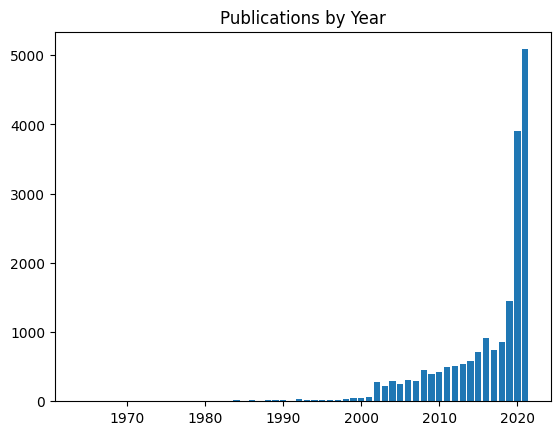

In [12]:
import pandas as pd
df = pd.read_csv(r'/content/metadata.csv')

# Basic info
print(df.shape)
print(df.info())

# Check missing values
print(df.isnull().sum())

# Simple visualization
import matplotlib.pyplot as plt
df['year'] = (
    pd.to_datetime(
        df['publish_time'],
        infer_datetime_format=True,
        errors='coerce'           # turn unparsable values into NaT
    )
    .dt.year                    # extract year (NaT → NaN)
)

year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Publications by Year')
plt.show()

In [13]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2001.0
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000.0
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000.0
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001.0
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001.0


In [14]:
# 1. DataFrame dimensions
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

# 2. Column data types
print(df.dtypes)

# 3. Missing‐value summary
missing = df.isnull().sum()
print(missing[missing > 0])

# 4. Basic statistics for numeric columns
print(df.describe())


Rows: 20141, Columns: 20
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id    float64
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
year                float64
dtype: object
sha                  2722
abstract             4432
authors              1023
journal               346
mag_id              20141
who_covidence_id    20141
arxiv_id            20141
pdf_json_files       2722
pmc_json_files       4924
url                     1
s2_id               20141
year                  939
dtype: int64
       mag_id  who_covidence_id  arxiv_id  s2_id          year
count     0.0

In [15]:
# Drop high-missing-rate columns
drop_cols = [
    'mag_id', 'who_covidence_id', 'arxiv_id',
    's2_id', 'pdf_json_files', 'pmc_json_files'
]
df_clean = df.drop(columns=drop_cols)

# Drop rows missing title or url
df_clean = df_clean.dropna(subset=['title', 'url'])

# Fill non-critical text fields
df_clean['abstract'] = df_clean['abstract'].fillna('')
df_clean['authors']  = df_clean['authors'].fillna('Unknown')
df_clean['journal']  = df_clean['journal'].fillna('Unknown')

# Ensure 'year' is populated
df_clean['year'] = pd.to_datetime(
    df_clean['publish_time'],
    infer_datetime_format=True,
    errors='coerce'
).dt.year

# Fallback: extract first 4 digits if still missing
mask = df_clean['year'].isna()
df_clean.loc[mask, 'year'] = (
    df_clean.loc[mask, 'publish_time']
           .astype(str)
           .str[:4]
           .astype(float)
)

# Final sanity check
print("Cleaned shape:", df_clean.shape)
print("Remaining missing values:\n", df_clean.isnull().sum())


Cleaned shape: (20140, 14)
Remaining missing values:
 cord_uid           0
sha             2722
source_x           0
title              0
doi                0
pmcid              0
pubmed_id          0
license            0
abstract           0
publish_time       0
authors            0
journal            0
url                0
year               0
dtype: int64


/tmp/ipython-input-2691888687.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['year'] = pd.to_datetime(


In [16]:



# 1. Convert publish_time to datetime
df_clean['publish_time'] = pd.to_datetime(
    df_clean['publish_time'],
    infer_datetime_format=True,
    errors='coerce'
)

# 2. Extract year (and month/day if needed)
df_clean['year'] = df_clean['publish_time'].dt.year
df_clean['month'] = df_clean['publish_time'].dt.month
df_clean['day'] = df_clean['publish_time'].dt.day

# 3. Compute abstract word count
df_clean['abstract_word_count'] = (
    df_clean['abstract']
      .astype(str)            # ensure text
      .str.split()            # split on whitespace
      .str.len()              # count tokens
)

# 4. Verify new columns
print(df_clean[['publish_time', 'year', 'month', 'abstract_word_count']].head())


/tmp/ipython-input-424513332.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['publish_time'] = pd.to_datetime(


  publish_time    year  month  abstract_word_count
0   2001-07-04  2001.0    7.0                  262
1   2000-08-15  2000.0    8.0                  142
2   2000-08-25  2000.0    8.0                  219
3   2001-02-22  2001.0    2.0                   68
4   2001-05-11  2001.0    5.0                  110


Papers per year:
 year
1964.0       1
1969.0       2
1970.0       3
1971.0       3
1972.0       4
1973.0       4
1974.0       7
1975.0      11
1976.0       8
1977.0      10
1978.0       6
1979.0       2
1980.0       9
1981.0       9
1982.0      11
1983.0       1
1984.0      12
1985.0       6
1986.0      13
1987.0      11
1988.0      14
1989.0      14
1990.0      19
1991.0      10
1992.0      26
1993.0      17
1994.0      18
1995.0      15
1996.0      21
1997.0      24
1998.0      28
1999.0      46
2000.0      46
2001.0      61
2002.0     281
2003.0     227
2004.0     292
2005.0     248
2006.0     302
2007.0     295
2008.0     456
2009.0     391
2010.0     416
2011.0     499
2012.0     515
2013.0     532
2014.0     581
2015.0     710
2016.0     920
2017.0     739
2018.0     856
2019.0    1455
2020.0    3908
2021.0    5086
Name: count, dtype: int64


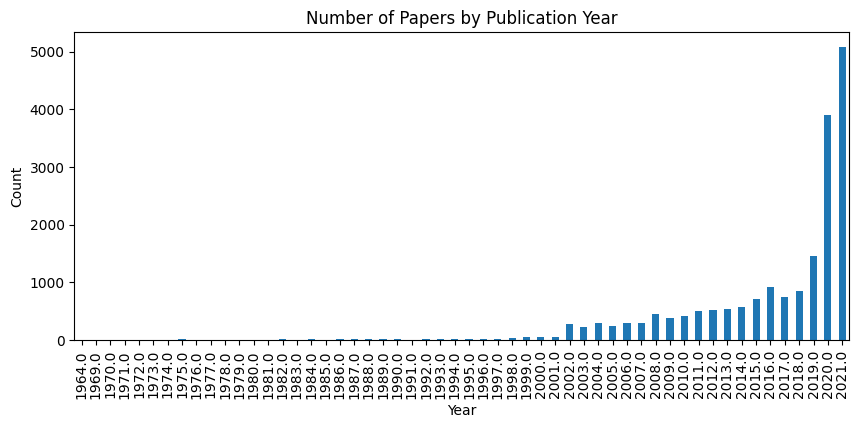


Top 10 journals for COVID-19 research:
 journal
Lancet                       29
ChemRxiv                     11
J Public Health (Oxf)        10
MMW Fortschr Med             10
Unknown                       8
Am J Respir Crit Care Med     6
Acta Biomed                   6
Rev Esp Cardiol (Engl Ed)     6
Euro Surveill                 5
Trials                        5
Name: count, dtype: int64


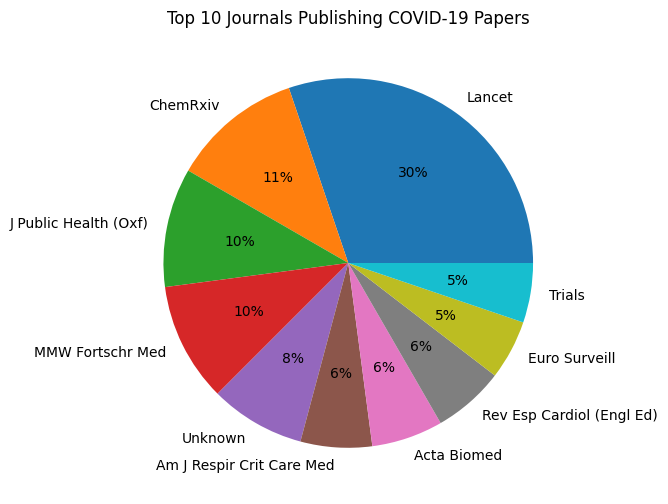


Top 20 words in titles:
 [('and', 9767), ('the', 7667), ('for', 3583), ('with', 2773), ('virus', 1937), ('from', 1363), ('study', 1237), ('patients', 1102), ('influenza', 1099), ('infection', 986), ('analysis', 940), ('disease', 895), ('human', 879), ('health', 866), ('respiratory', 836), ('cell', 818), ('based', 710), ('cells', 709), ('acute', 673), ('review', 653)]


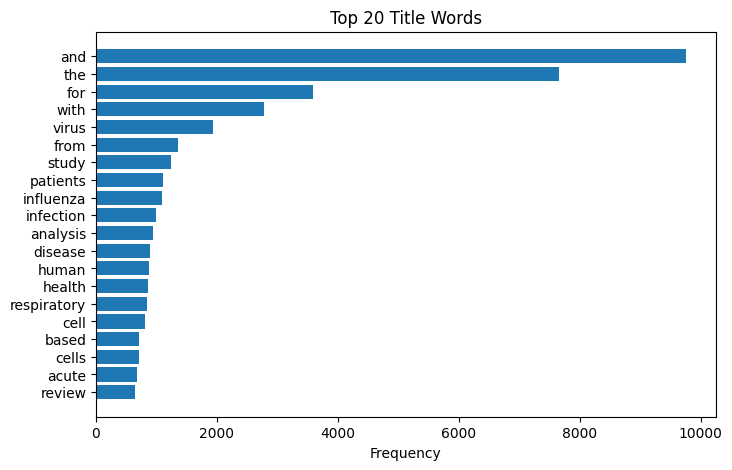

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re


# 1) Count papers by publication year
year_counts = df_clean['year'].value_counts().sort_index()
print("Papers per year:\n", year_counts)

# optional bar chart
plt.figure(figsize=(10,4))
year_counts.plot(kind='bar')
plt.title("Number of Papers by Publication Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


# 2) Top journals publishing COVID-19 research
mask = (
    df_clean['title'].str.contains('covid', case=False, na=False)
    | df_clean['abstract'].str.contains('covid', case=False, na=False)
)
top_journals = df_clean[mask]['journal'].value_counts().head(10)
print("\nTop 10 journals for COVID-19 research:\n", top_journals)

# optional pie chart
top_journals.plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))
plt.ylabel('')
plt.title("Top 10 Journals Publishing COVID-19 Papers")
plt.show()


# 3) Most frequent words in titles
titles = df_clean['title'].dropna().astype(str).str.lower()

# split into words, drop empty strings
all_words = titles.str.findall(r'\b\w+\b').explode()
# remove very short tokens (e.g., “a”, “I”) if you like:
all_words = all_words[all_words.str.len() > 2]

word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
print("\nTop 20 words in titles:\n", common_words)

# optional horizontal bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(8,5))
plt.barh(words[::-1], counts[::-1])
plt.title("Top 20 Title Words")
plt.xlabel("Frequency")
plt.show()


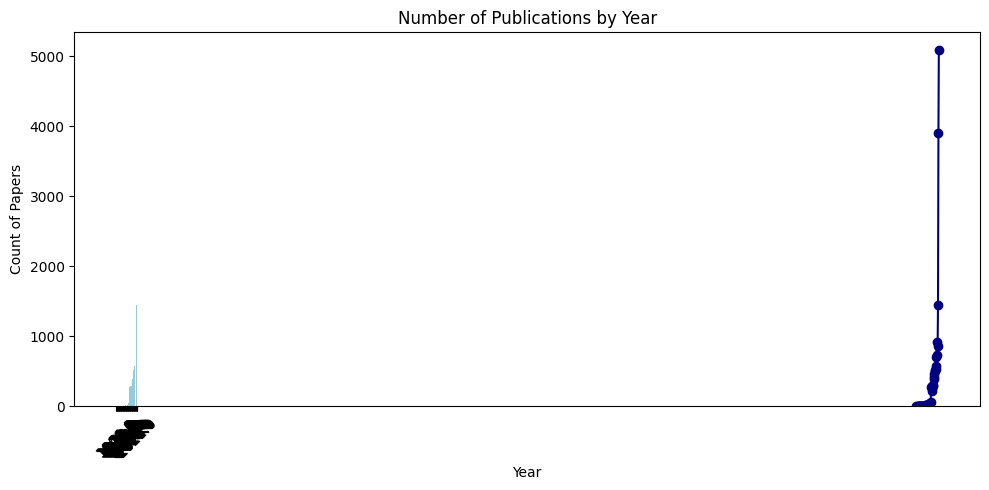

In [18]:
from wordcloud import WordCloud
import seaborn as sns
# Count papers per year
year_counts = df_clean['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index, y=year_counts.values, color='skyblue')
plt.plot(year_counts.index, year_counts.values, color='navy', marker='o')
plt.title('Number of Publications by Year')
plt.xlabel('Year')
plt.ylabel('Count of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipython-input-3070833445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


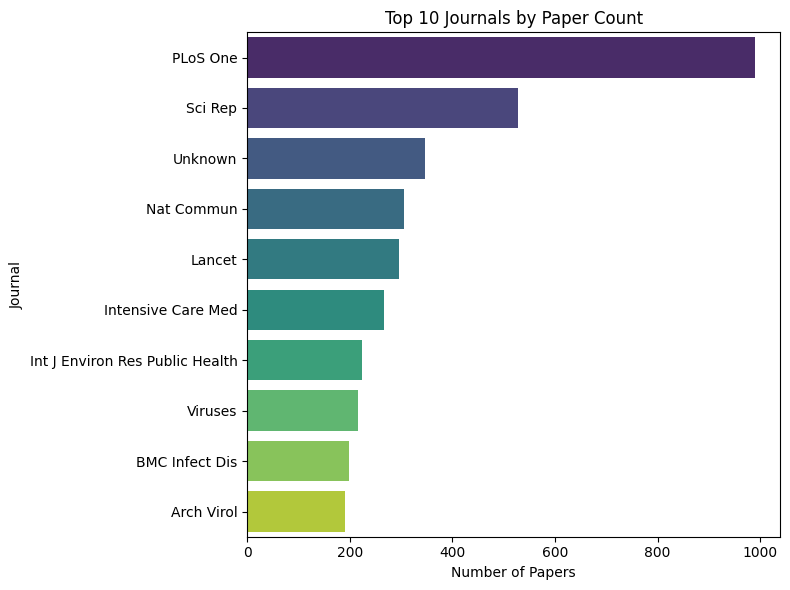

In [19]:
# Top 10 journals overall
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(
    y=top_journals.index,
    x=top_journals.values,
    palette='viridis'
)
plt.title('Top 10 Journals by Paper Count')
plt.xlabel('Number of Papers')
plt.ylabel('Journal')
plt.tight_layout()
plt.show()


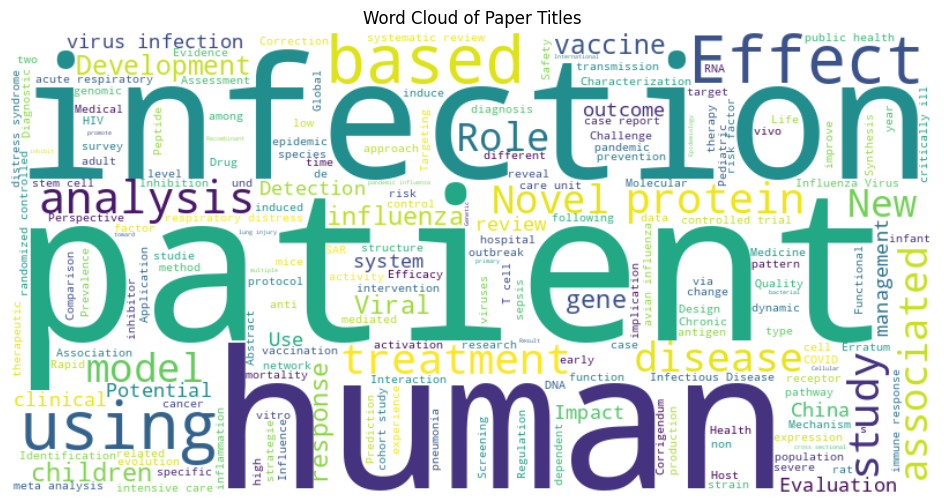

In [20]:
# Combine all titles into one text blob
text = " ".join(df_clean['title'].dropna().astype(str).tolist())

# Generate word cloud
wc = WordCloud(
    width=800, height=400,
    background_color='white',
    max_words=200
).generate(text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()


/tmp/ipython-input-4231516260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


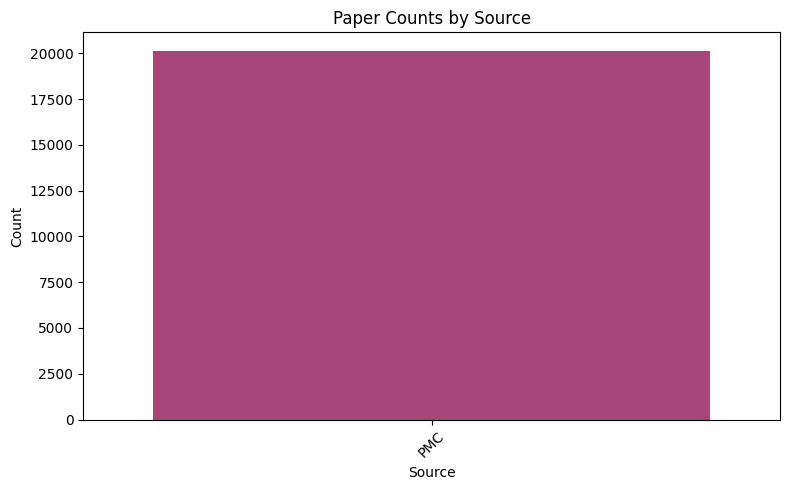

In [21]:
# Frequency by source
source_counts = df_clean['source_x'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(
    x=source_counts.index,
    y=source_counts.values,
    palette='magma'
)
plt.title('Paper Counts by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
df_clean.to_csv('metadata_clean.csv', index=False)


In [24]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.6 MB/s eta 0:00:00


2025-09-19 11:29:48.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 11:29:48.212 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-19 11:29:48.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 11:29:48.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 11:29:48.215 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

202

DeltaGenerator()

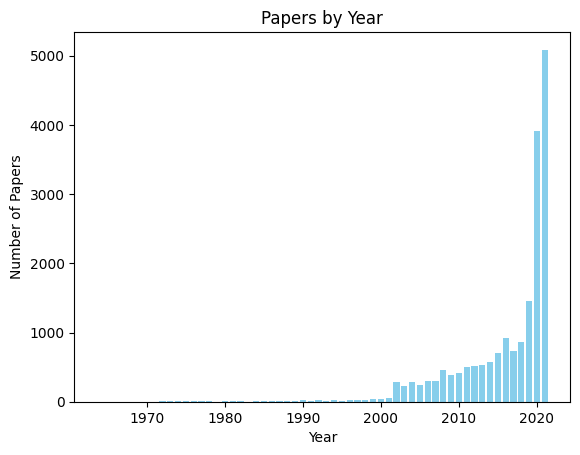

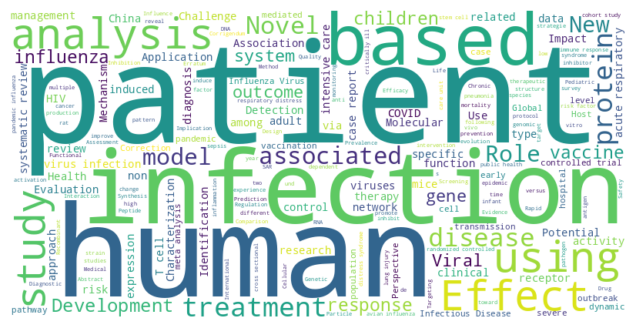

In [25]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Data loading and caching
@st.cache
def load_data(path='/content/metadata_clean.csv'):
    df = pd.read_csv(path)
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    df['year'] = df['publish_time'].dt.year
    return df

df = load_data()

# 2. Page layout
st.title("📊 Research Publications Dashboard")
st.markdown("""
Explore publication trends, top journals, and title word-clouds.
Use the sidebar to filter by year and journal.
""")

# 3. Interactive filters
st.sidebar.header("🔍 Filters")
min_year, max_year = int(df['year'].min()), int(df['year'].max())
year_range = st.sidebar.slider(
    "Publication Year Range",
    min_year, max_year,
    (min_year, max_year)
)

journals = ["All"] + sorted(df['journal'].dropna().unique().tolist())
selected_journal = st.sidebar.selectbox("Journal", journals)

# 4. Data subsetting
mask = df['year'].between(year_range[0], year_range[1])
if selected_journal != "All":
    mask &= df['journal'] == selected_journal
filtered = df[mask]

# 5. Visualizations

## 5.1 Publications Over Time
st.subheader("Publications Over Time")
year_counts = filtered['year'].value_counts().sort_index()
fig1, ax1 = plt.subplots()
ax1.bar(year_counts.index, year_counts.values, color='skyblue')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Papers")
ax1.set_title("Papers by Year")
st.pyplot(fig1)

## 5.2 Top Journals
st.subheader("Top Journals")
top_n = st.slider("Show Top N Journals", 5, 20, 10)
journal_counts = filtered['journal'].value_counts().head(top_n)
st.bar_chart(journal_counts)

## 5.3 Word Cloud of Titles
st.subheader("Title Word Cloud")
text = " ".join(filtered['title'].dropna().astype(str))
wc = WordCloud(width=800, height=400, background_color='white')\
       .generate(text)
fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.imshow(wc, interpolation='bilinear')
ax2.axis('off')
st.pyplot(fig2)

# 6. Sample of the data
st.subheader("Sample Data")
st.dataframe(filtered.head(10))


In [ ]:
%pip install streamlit